### Bar plot for each test dataset
Top-1,3,5 Accuracy for each model per dataset

In [1]:
import rootutils
ROOT = rootutils.setup_root(".", indicator=".project-root", pythonpath=True)
from src.plotting.utils import load_scores_per_dataset_one_fraction

scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores_linear_probe.csv",
    method="linear",
    method_notes="last_image_layer",
)

In [3]:
len(scores)

13

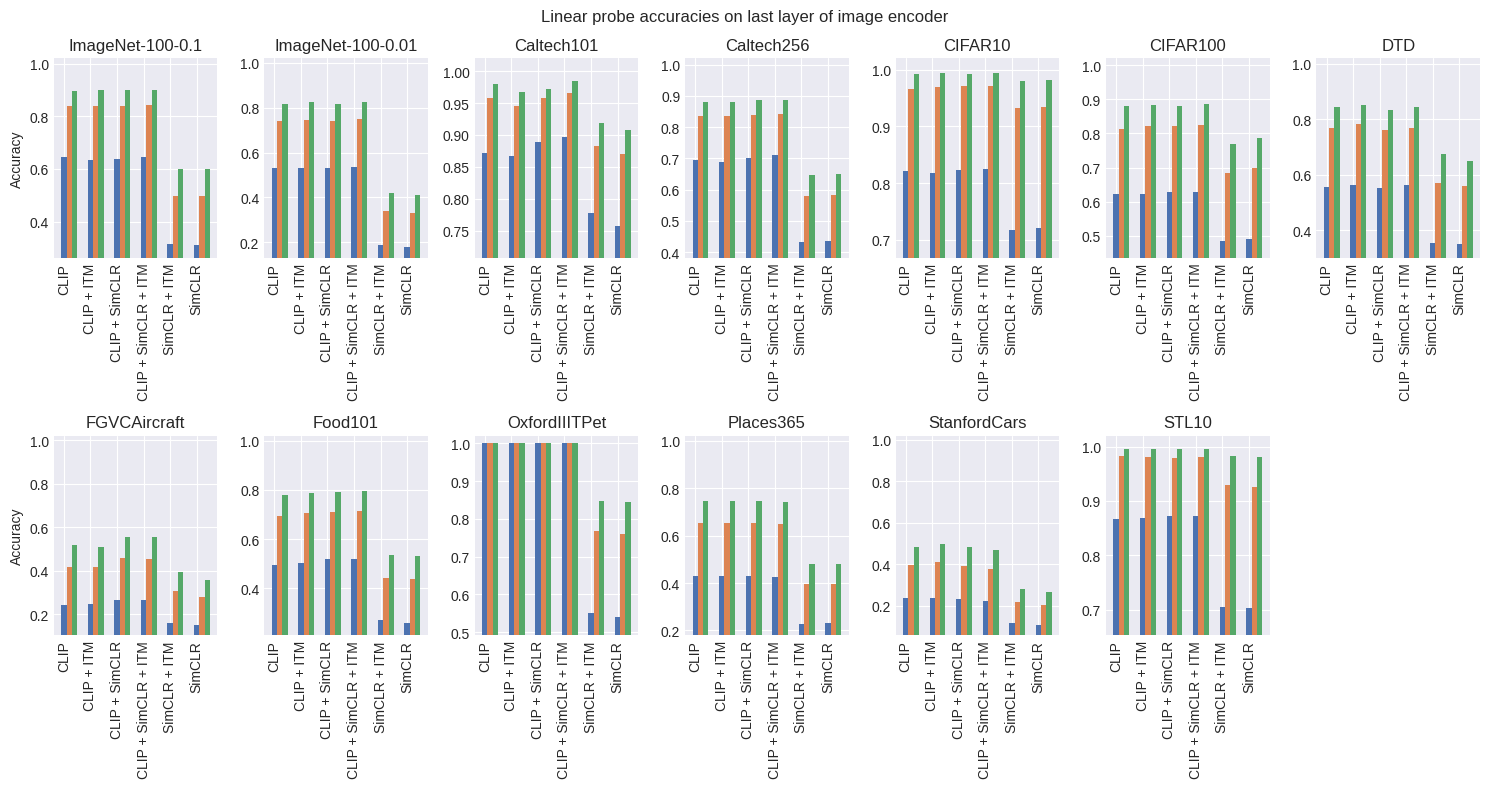

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)

fig_title = "Linear probe accuracies on last layer of image encoder"
ylabel = "Accuracy"
baselines = {
    "ImageNet-100-0.1": 1/100.,
    "ImageNet-100-0.01": 1/100.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'DTD':1/47.,
    'OxfordIIITPet':1./37 ,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'Food101': 1./101,
    'STL10': 1./10,
    'Places365': 1./365,
}
model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "SimCLR + ITM", "SimCLR"]
width = 0.2

fig, axs = plt.subplots(2, 7, figsize=(15, 8))
fig.delaxes(axs.flat[13])
fig.suptitle(fig_title)
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)
xsplot = np.arange(len(model_names))

for sind, dataset in enumerate(scores.keys()):
    top1 = [scores[dataset][model]["Top1Accuracy"] for model in model_names]
    top3 = [scores[dataset][model]["Top3Accuracy"] for model in model_names]
    top5 = [scores[dataset][model]["Top5Accuracy"] for model in model_names]
    min_y = min(min(top1), min(top3), min(top5))
    axs.flat[sind].set_title(dataset)
    axs.flat[sind].bar(xsplot, top1, width=width, color=colors[0], label='Top1')
    axs.flat[sind].bar(xsplot+width, top3, width=width, color=colors[1], label='Top3')
    axs.flat[sind].bar(xsplot+width*2, top5, width=width, color=colors[2], label='Top5')
    axs.flat[sind].axhline(baselines[dataset], linestyle='dashed', color='gray')
    axs.flat[sind].set_xticks(xsplot, model_names, rotation=90)
    axs.flat[sind].set_ylim(min_y - 0.05, 1.02)
# plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
fig.tight_layout()

### Zero-shot accuracies per dataset, full models

In [31]:
import rootutils
ROOT = rootutils.setup_root(".", indicator=".project-root", pythonpath=True)
from src.plotting.utils import load_scores_per_dataset_one_fraction

scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores.csv",
    method="zeroshot",
    method_notes="1_templates",
    dataset_fraction="1.0",
)

KeyError: 'ImageNet'

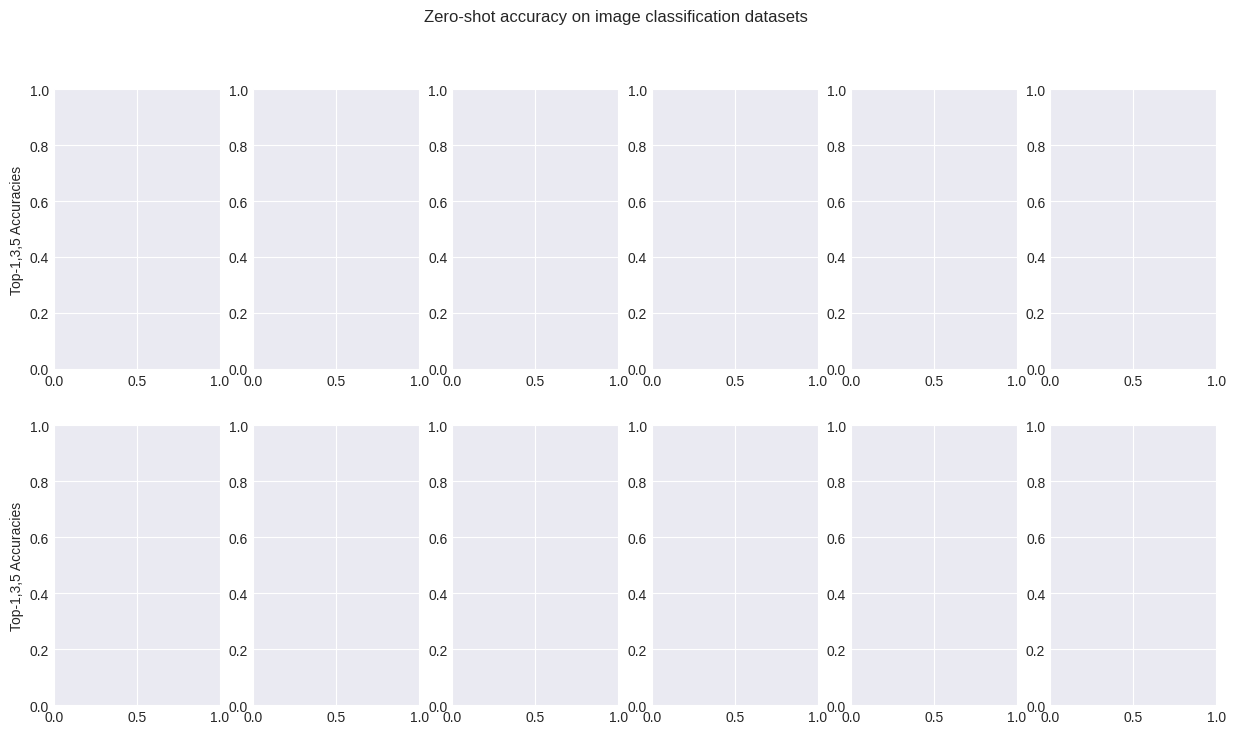

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)

fig_title = "Zero-shot accuracy on image classification datasets"

baselines = {
    "ImageNet": 1/1000.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'DTD':1/47.,
    'OxfordIIITPet':1./37 ,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'Food101': 1./101,
    'STL10': 1./10,
    'Places365': 1./365,
}
model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "SimCLR + ITM", "SimCLR"]
dataset_order = ["ImageNet",'Caltech101','Caltech256','CIFAR10','CIFAR100','STL10',
                 'Places365','Food101','OxfordIIITPet','StanfordCars','FGVCAircraft','DTD']
width = 0.2

fig, axs = plt.subplots(2, 6, figsize=(15, 8))
ylabel = "Top-1 Accuracy"
ylabel = "Top-1,3,5 Accuracies"
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)

fig.suptitle(fig_title)
xsplot = np.arange(len(model_names))

# for sind, dataset in enumerate(scores.keys()):
for sind, dataset in enumerate(dataset_order):
    top1 = [scores[dataset][model]["Top1Accuracy"] for model in model_names]
    top3 = [scores[dataset][model]["Top3Accuracy"] for model in model_names]
    top5 = [scores[dataset][model]["Top5Accuracy"] for model in model_names]
    min_y = min(min(top1), min(top3), min(top5))
    axs.flat[sind].set_title(dataset)
    axs.flat[sind].bar(xsplot, top1, width=width, color=colors[0], label='Top1')
    axs.flat[sind].bar(xsplot+width, top3, width=width, color=colors[1], label='Top3')
    axs.flat[sind].bar(xsplot+width*2, top5, width=width, color=colors[2], label='Top5')
    axs.flat[sind].axhline(baselines[dataset], linestyle='dashed', color='gray')
    axs.flat[sind].set_xticks(xsplot, model_names, rotation=90)
    # axs.flat[sind].set_ylim(min_y - 0.05, 1.02)
# plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
fig.tight_layout()

### Linear probe accuracies per dataset, full models

In [55]:
import rootutils
ROOT = rootutils.setup_root(".", indicator=".project-root", pythonpath=True)
from src.plotting.utils import load_scores_per_dataset_one_fraction

scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores_linear_probe.csv",
    method="linear",
    method_notes="last_image_layer",
    dataset_fraction="1.0",
)

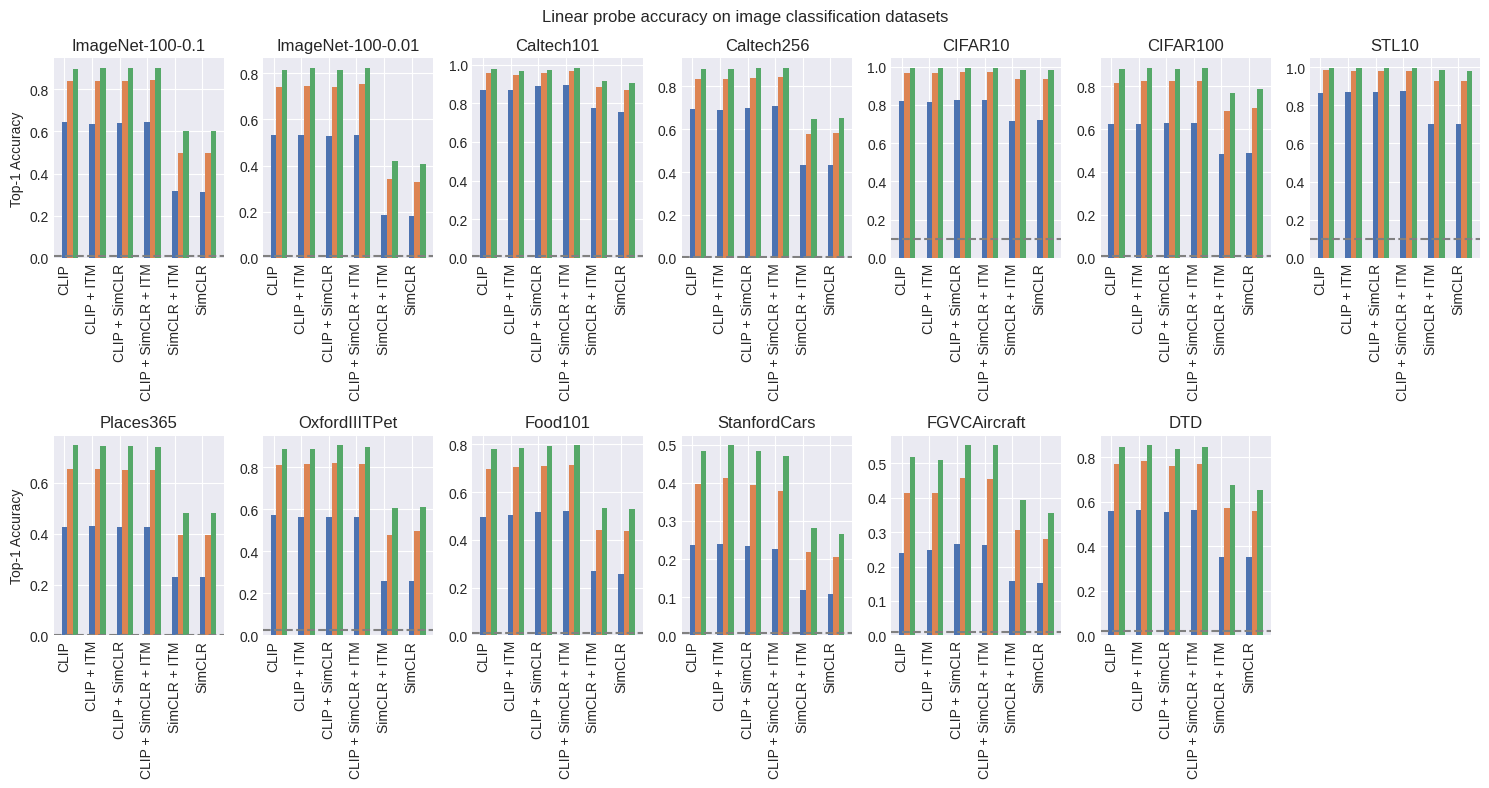

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)

fig_title = "Linear probe accuracy on image classification datasets"

baselines = {
    "ImageNet-100-0.1": 1/100.,
    "ImageNet-100-0.01": 1/100.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'STL10': 1./10,
    'Places365': 1./365,
    'OxfordIIITPet':1./37,
    'Food101': 1./101,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'DTD':1/47.,
}
model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "SimCLR + ITM", "SimCLR"]
width = 0.2

fig, axs = plt.subplots(2, 7, figsize=(15, 8))
fig.delaxes(axs.flat[13])
ylabel = "Top-1 Accuracy"
# ylabel = "Top-1,3,5 Accuracies"
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)

fig.suptitle(fig_title)
xsplot = np.arange(len(model_names))

# for sind, dataset in enumerate(scores.keys()):
for sind, dataset in enumerate(baselines.keys()):
    top1 = [scores[dataset][model]["Top1Accuracy"] for model in model_names]
    top3 = [scores[dataset][model]["Top3Accuracy"] for model in model_names]
    top5 = [scores[dataset][model]["Top5Accuracy"] for model in model_names]
    # min_y = min(min(top1), min(top3), min(top5))
    axs.flat[sind].set_title(dataset)
    axs.flat[sind].bar(xsplot, top1, width=width, color=colors[0], label='Top1')
    axs.flat[sind].bar(xsplot+width, top3, width=width, color=colors[1], label='Top3')
    axs.flat[sind].bar(xsplot+width*2, top5, width=width, color=colors[2], label='Top5')
    axs.flat[sind].axhline(baselines[dataset], linestyle='dashed', color='gray')
    axs.flat[sind].set_xticks(xsplot, model_names, rotation=90)
    # axs.flat[sind].set_ylim(min_y - 0.05, 1.02)
# plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
fig.tight_layout()

### Zero-shot accuracies per dataset, full models + high-res models + high-aug models

In [33]:
import rootutils
ROOT = rootutils.setup_root(".", indicator=".project-root", pythonpath=True)
from src.plotting.utils import load_scores_per_dataset_one_fraction

regular_scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores.csv",
    method="zeroshot",
    method_notes="1_templates",
    dataset_fraction="1.0",
)

high_res_scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores.csv",
    method="zeroshot",
    method_notes="1_templates",
    dataset_fraction="1.384",
)

high_aug_scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores.csv",
    method="zeroshot",
    method_notes="1_templates",
    dataset_fraction="1-aug",
)

Error: Places365, SimCLR + ITM, 1.384


In [34]:
regular_scores

{'Caltech101': {'CLIP + ITM': {'Top1Accuracy': 0.4747154712677002,
   'Top3Accuracy': 0.7022042870521545,
   'Top5Accuracy': 0.7673245668411255},
  'CLIP': {'Top1Accuracy': 0.4228497445583343,
   'Top3Accuracy': 0.6445757150650024,
   'Top5Accuracy': 0.7145944237709045},
  'CLIP + SimCLR + ITM': {'Top1Accuracy': 0.4263074398040771,
   'Top3Accuracy': 0.6274312138557434,
   'Top5Accuracy': 0.6913989186286926},
  'SimCLR': {'Top1Accuracy': 0.0056187869049608,
   'Top3Accuracy': 0.0167122893035411,
   'Top5Accuracy': 0.0266532208770513},
  'SimCLR + ITM': {'Top1Accuracy': 0.0123901451006531,
   'Top3Accuracy': 0.0417807213962078,
   'Top5Accuracy': 0.0606540851294994},
  'CLIP + SimCLR': {'Top1Accuracy': 0.4232819378376007,
   'Top3Accuracy': 0.621956467628479,
   'Top5Accuracy': 0.6808817386627197}},
 'Caltech256': {'CLIP + ITM': {'Top1Accuracy': 0.3465386927127838,
   'Top3Accuracy': 0.5005105137825012,
   'Top5Accuracy': 0.567531168460846},
  'CLIP': {'Top1Accuracy': 0.3399632573127746

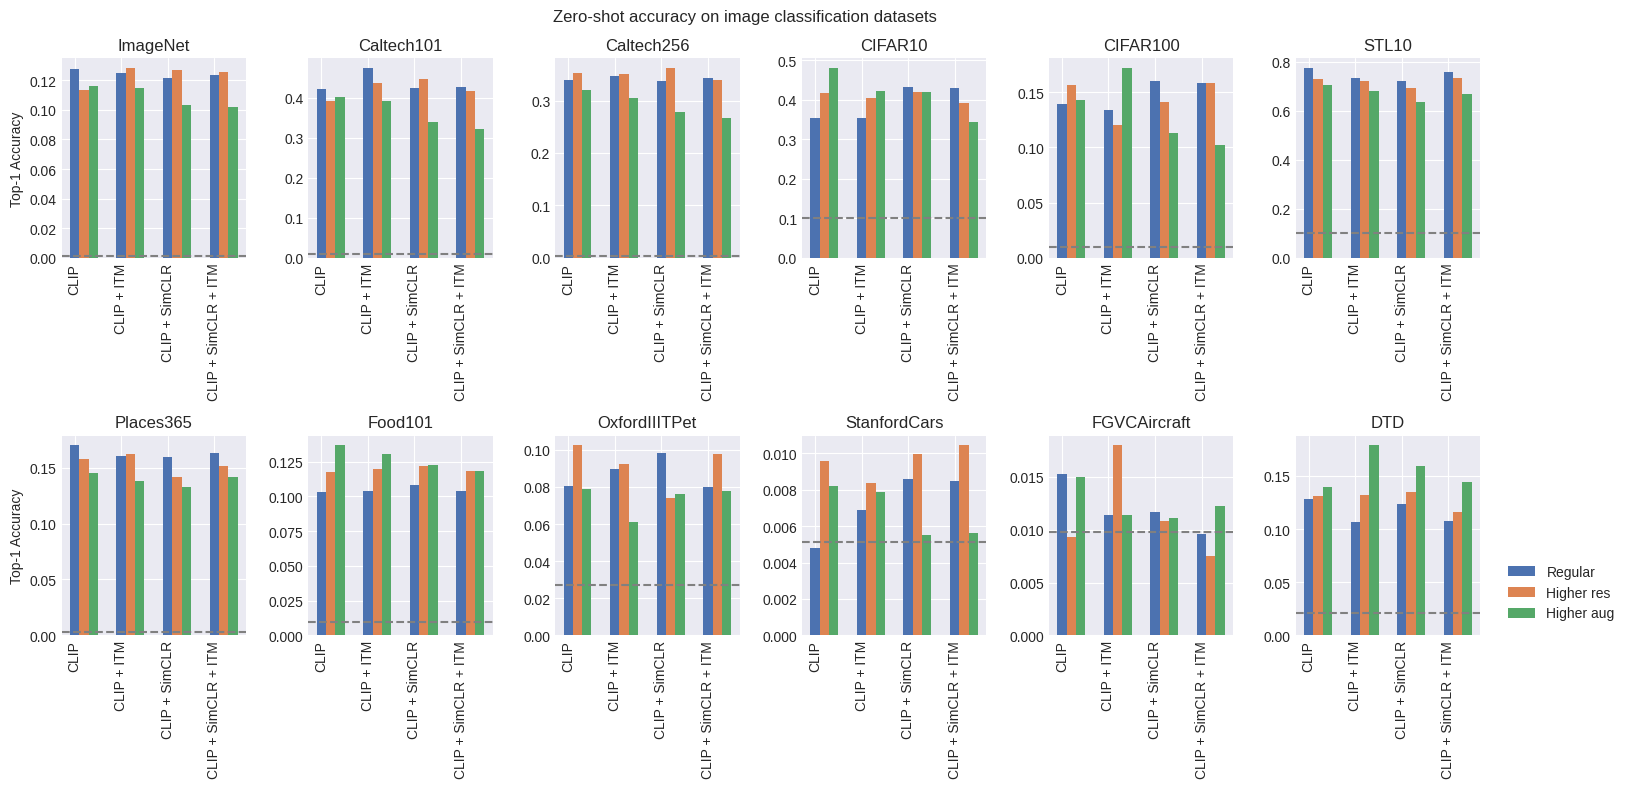

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)

fig_title = "Zero-shot accuracy on image classification datasets"

baselines = {
    "ImageNet": 1/1000.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'DTD':1/47.,
    'OxfordIIITPet':1./37 ,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'Food101': 1./101,
    'STL10': 1./10,
    'Places365': 1./365,
}
# model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "SimCLR + ITM", "SimCLR"]
model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM"]
dataset_order = ["ImageNet",'Caltech101','Caltech256','CIFAR10','CIFAR100','STL10',
                 'Places365','Food101','OxfordIIITPet','StanfordCars','FGVCAircraft','DTD']
width = 0.2

fig, axs = plt.subplots(2, 6, figsize=(15, 8))
ylabel = "Top-1 Accuracy"
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)

fig.suptitle(fig_title)
xsplot = np.arange(len(model_names))

# for sind, dataset in enumerate(scores.keys()):
for sind, dataset in enumerate(dataset_order):
    regular_models = [regular_scores[dataset][model]["Top1Accuracy"] for model in model_names]
    high_res_models = [high_res_scores[dataset][model]["Top1Accuracy"] for model in model_names]
    high_aug_models = [high_aug_scores[dataset][model]["Top1Accuracy"] for model in model_names]
    # min_y = min(min(top1), min(top3), min(top5))
    axs.flat[sind].set_title(dataset)
    axs.flat[sind].bar(xsplot, regular_models, width=width, color=colors[0], label='Regular')
    axs.flat[sind].bar(xsplot+width, high_res_models, width=width, color=colors[1], label='Higher res')
    axs.flat[sind].bar(xsplot+width*2, high_aug_models, width=width, color=colors[2], label='Higher aug')
    axs.flat[sind].axhline(baselines[dataset], linestyle='dashed', color='gray')
    axs.flat[sind].set_xticks(xsplot, model_names, rotation=90)
    # axs.flat[sind].set_ylim(min_y - 0.05, 1.02)

handles, labels = axs.flat[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 0.2), loc='lower left')
# plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
fig.tight_layout()

### Linear probe accuracies per dataset, full models + high-res models + high-aug models

In [60]:
import rootutils
ROOT = rootutils.setup_root(".", indicator=".project-root", pythonpath=True)
from src.plotting.utils import load_scores_per_dataset_one_fraction

regular_scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores_linear_probe.csv",
    method="linear",
    method_notes="last_image_layer",
    dataset_fraction="1.0",
)

high_res_scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores_linear_probe.csv",
    method="linear",
    method_notes="last_image_layer",
    dataset_fraction="1.384",
)

high_aug_scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores_linear_probe.csv",
    method="linear",
    method_notes="last_image_layer",
    dataset_fraction="1-aug",
)

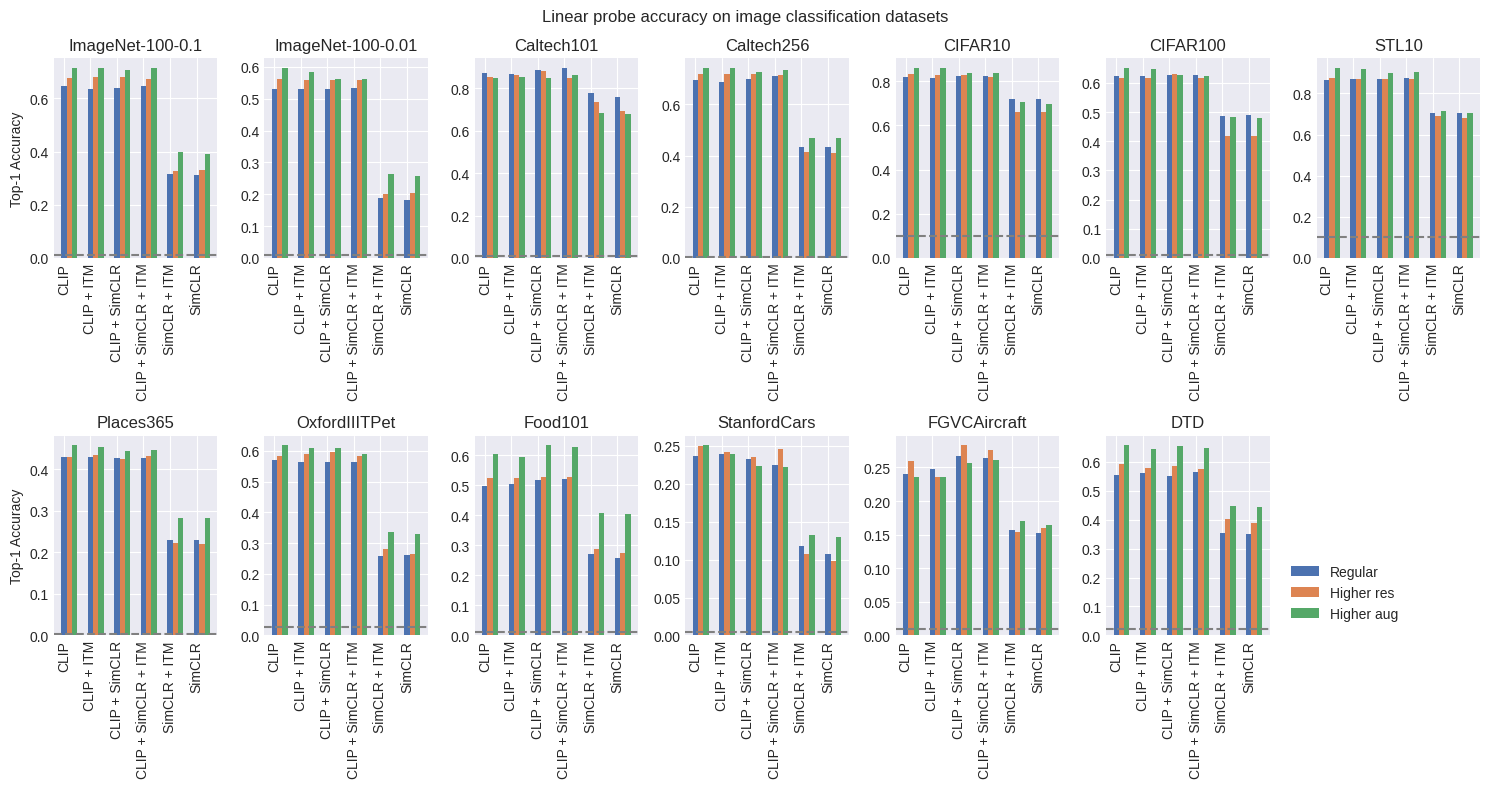

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)

fig_title = "Linear probe accuracy on image classification datasets"

baselines = {
    "ImageNet-100-0.1": 1/100.,
    "ImageNet-100-0.01": 1/100.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'STL10': 1./10,
    'Places365': 1./365,
    'OxfordIIITPet':1./37,
    'Food101': 1./101,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'DTD':1/47.,
}
model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "SimCLR + ITM", "SimCLR"]
width = 0.2

fig, axs = plt.subplots(2, 7, figsize=(15, 8))
fig.delaxes(axs.flat[13])
# fig.delaxes(axs.flat[14])
ylabel = "Top-1 Accuracy"
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)

fig.suptitle(fig_title)
xsplot = np.arange(len(model_names))

# for sind, dataset in enumerate(scores.keys()):
for sind, dataset in enumerate(baselines.keys()):
    regular_models = [regular_scores[dataset][model]["Top1Accuracy"] for model in model_names]
    high_res_models = [high_res_scores[dataset][model]["Top1Accuracy"] for model in model_names]
    high_aug_models = [high_aug_scores[dataset][model]["Top1Accuracy"] for model in model_names]
    # min_y = min(min(top1), min(top3), min(top5))
    axs.flat[sind].set_title(dataset)
    axs.flat[sind].bar(xsplot, regular_models, width=width, color=colors[0], label='Regular')
    axs.flat[sind].bar(xsplot+width, high_res_models, width=width, color=colors[1], label='Higher res')
    axs.flat[sind].bar(xsplot+width*2, high_aug_models, width=width, color=colors[2], label='Higher aug')
    axs.flat[sind].axhline(baselines[dataset], linestyle='dashed', color='gray')
    axs.flat[sind].set_xticks(xsplot, model_names, rotation=90)
    # axs.flat[sind].set_ylim(min_y - 0.05, 1.02)

handles, labels = axs.flat[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.25), loc='center')
# plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
fig.tight_layout()

#### Per model

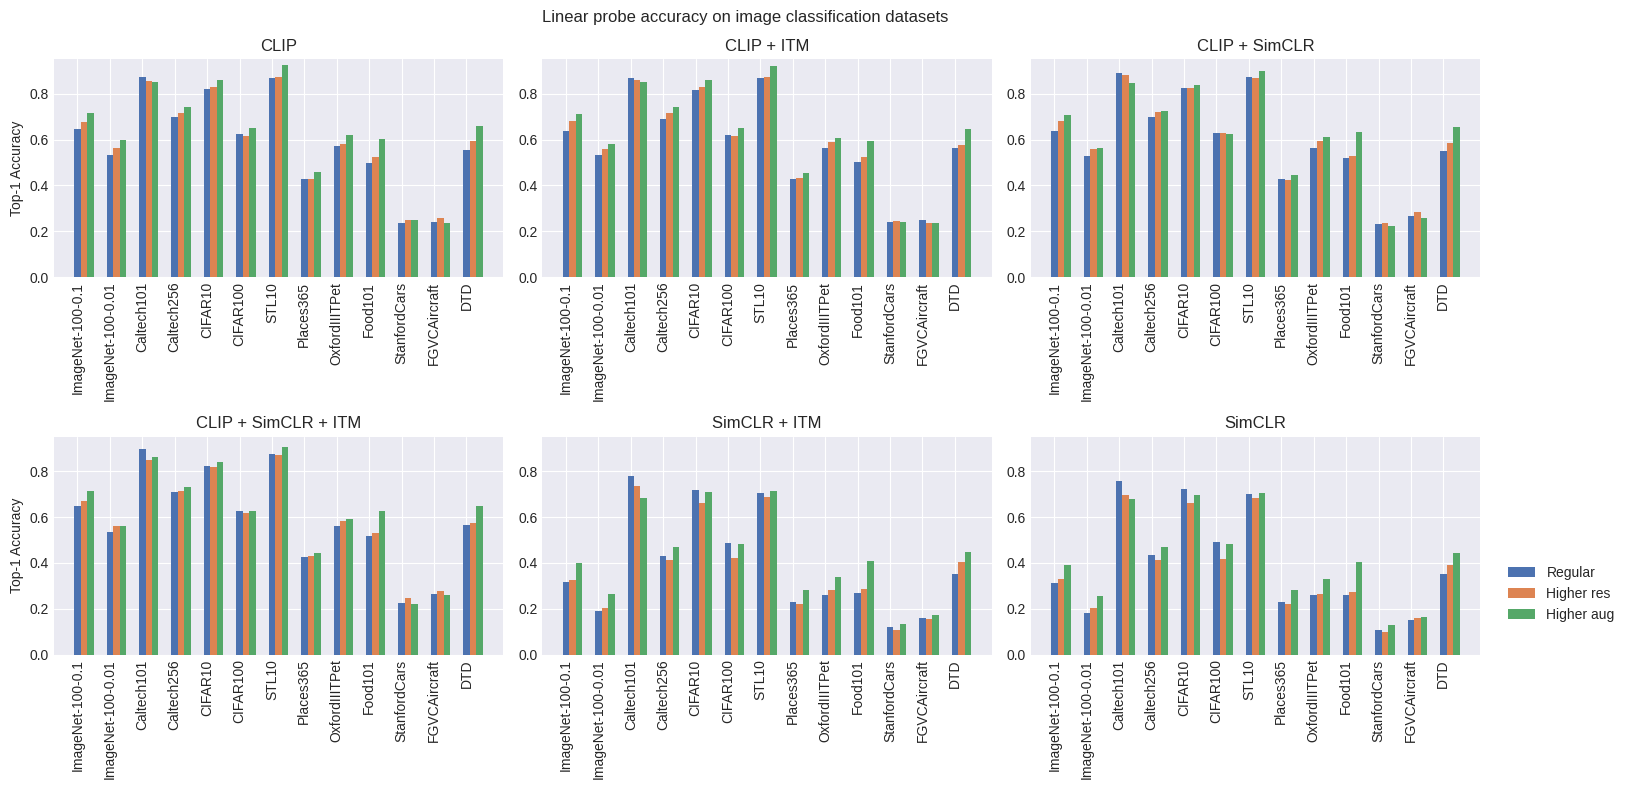

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)
# colors = sns.color_palette("mako", 3)
# colors = ['k', 'g', 'b']

fig_title = "Linear probe accuracy on image classification datasets"

baselines = {
    "ImageNet-100-0.1": 1/100.,
    "ImageNet-100-0.01": 1/100.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'STL10': 1./10,
    'Places365': 1./365,
    'OxfordIIITPet':1./37,
    'Food101': 1./101,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'DTD':1/47.,
}
model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "SimCLR + ITM", "SimCLR"]
# model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM"]
width = 0.2

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
ylabel = "Top-1 Accuracy"
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)

fig.suptitle(fig_title)
xsplot = np.arange(len(baselines.keys()))

# for sind, dataset in enumerate(scores.keys()):
for sind, model in enumerate(model_names):
    regular_models = [regular_scores[dataset][model]["Top1Accuracy"] for dataset in baselines.keys()]
    high_res_models = [high_res_scores[dataset][model]["Top1Accuracy"] for dataset in baselines.keys()]
    high_aug_models = [high_aug_scores[dataset][model]["Top1Accuracy"] for dataset in baselines.keys()]
    # min_y = min(min(top1), min(top3), min(top5))
    axs.flat[sind].set_title(model)
    axs.flat[sind].bar(xsplot, regular_models, width=width, color=colors[0], label='Regular')
    axs.flat[sind].bar(xsplot+width, high_res_models, width=width, color=colors[1], label='Higher res')
    axs.flat[sind].bar(xsplot+width*2, high_aug_models, width=width, color=colors[2], label='Higher aug')
    # axs.flat[sind].axhline(baselines[dataset], linestyle='dashed', color='gray')
    axs.flat[sind].set_xticks(xsplot, baselines.keys(), rotation=90)
    axs.flat[sind].set_ylim(0, 0.95)

handles, labels = axs.flat[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 0.2), loc='lower left')
# plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
fig.tight_layout()

### Zero-shot accuracies per model, for full, high-res and high-aug models

In [ ]:
import rootutils
ROOT = rootutils.setup_root(".", indicator=".project-root", pythonpath=True)
from src.plotting.utils import load_scores_per_dataset_one_fraction

regular_scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores.csv",
    method="zeroshot",
    method_notes="1_templates",
    dataset_fraction="1.0",
)

high_res_scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores.csv",
    method="zeroshot",
    method_notes="1_templates",
    dataset_fraction="1.384",
)

high_aug_scores = load_scores_per_dataset_one_fraction(
    "/home/phisch/multimodal/test_results/model_scores.csv",
    method="zeroshot",
    method_notes="1_templates",
    dataset_fraction="1-aug",
)

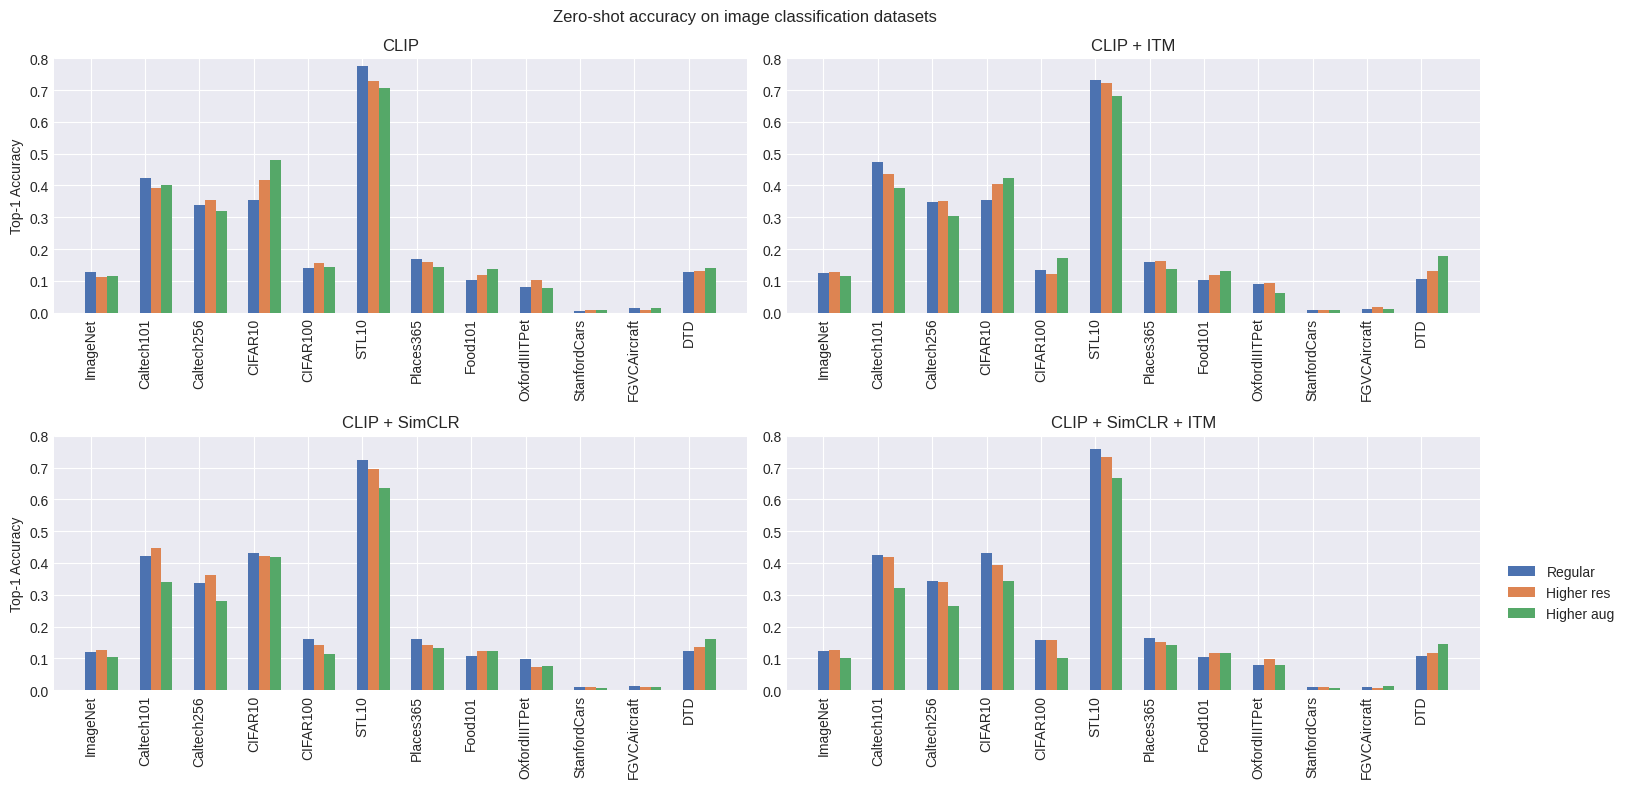

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)
# colors = sns.color_palette("mako", 3)
# colors = ['k', 'g', 'b']


fig_title = "Zero-shot accuracy on image classification datasets"

baselines = {
    "ImageNet": 1/1000.,
    'Caltech101':1/101.,
    'Caltech256':1/256.,
    'CIFAR10':1/10.,
    'CIFAR100':1/100.,
    'DTD':1/47.,
    'OxfordIIITPet':1./37 ,
    'StanfordCars': 1./196,
    'FGVCAircraft' : 1./102,
    'Food101': 1./101,
    'STL10': 1./10,
    'Places365': 1./365,
}
# model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "SimCLR + ITM", "SimCLR"]
model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM"]
dataset_order = ["ImageNet",'Caltech101','Caltech256','CIFAR10','CIFAR100','STL10',
                 'Places365','Food101','OxfordIIITPet','StanfordCars','FGVCAircraft','DTD']
width = 0.2

fig, axs = plt.subplots(2, 2, figsize=(15, 8))
ylabel = "Top-1 Accuracy"
axs[0,0].set_ylabel(ylabel)
axs[1,0].set_ylabel(ylabel)

fig.suptitle(fig_title)
xsplot = np.arange(len(dataset_order))

# for sind, dataset in enumerate(scores.keys()):
for sind, model in enumerate(model_names):
    regular_models = [regular_scores[dataset][model]["Top1Accuracy"] for dataset in dataset_order]
    high_res_models = [high_res_scores[dataset][model]["Top1Accuracy"] for dataset in dataset_order]
    high_aug_models = [high_aug_scores[dataset][model]["Top1Accuracy"] for dataset in dataset_order]
    # min_y = min(min(top1), min(top3), min(top5))
    axs.flat[sind].set_title(model)
    axs.flat[sind].bar(xsplot, regular_models, width=width, color=colors[0], label='Regular')
    axs.flat[sind].bar(xsplot+width, high_res_models, width=width, color=colors[1], label='Higher res')
    axs.flat[sind].bar(xsplot+width*2, high_aug_models, width=width, color=colors[2], label='Higher aug')
    # axs.flat[sind].axhline(baselines[dataset], linestyle='dashed', color='gray')
    axs.flat[sind].set_xticks(xsplot, dataset_order, rotation=90)
    axs.flat[sind].set_ylim(0, 0.8)

handles, labels = axs.flat[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1, 0.2), loc='lower left')
# plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
fig.tight_layout()

## Retrieval

In [8]:
import pandas as pd

def load_retrieval_scores(
        csv_path: str,
):
    scores = pd.read_csv(csv_path)
    # selected_scores = scores.loc[(scores["method"] == method) &
    #                             (scores["method_notes"] == method_notes) &
    #                             (scores["metric"] == metric)]
    # datasets = selected_scores["dataset"].unique()
    datasets = ["mscoco_captions", "flickr8k", "flickr30k"]
    # data_fractions = np.sort(selected_scores["dataset_fraction"].unique()) # sort fractions in ascending order
    data_fractions = ["0.05", "0.1", "0.2", "0.4", "0.6", "0.8", "1", "1-aug", "1*"]
    # models = selected_scores["model_name"].unique()
    models = [model.split("_")[0] for model in scores["model"].unique()]
    # models = scores["model"].unique()
    metrics = [f"{modality}_retrieval_recall@{k}" for modality in ["image", "text"] for k in [1, 5, 10]]

    plotting_scores = {} # {dataset: {model: {image_retrieval: [scores from 0.05 to 1*], text_retrieval: [scores from 0.05 to 1*]}}}

    for dataset in datasets:
        plotting_scores[dataset] = {}
        for model in models:
            plotting_scores[dataset][model] = {}
            for metric in metrics:
                plotting_scores[dataset][model][metric] = []
                for fraction in data_fractions:
                    if "MLM" in model and fraction != "1-aug":
                        continue
                    model_name = f"{model}_{fraction}"
                    try:
                        score = scores.loc[(scores["dataset"] == dataset) & 
                                        (scores["model"] == model_name), metric].item()
                    except:
                        print(f"Error: {dataset}, {model}, {fraction}")
                        score = None
                    plotting_scores[dataset][model][metric].append(score)
        #         model_scores[metric] = metric_scores
        #     dataset_scores[model] = model_scores
        # plotting_scores[dataset] = dataset_scores

    return plotting_scores

In [9]:
scores = load_retrieval_scores(
    "/home/phisch/multimodal/test_results/model_scores_retrieval.csv",
)

In [19]:
scores.keys()

dict_keys(['mscoco_captions', 'flickr8k', 'flickr30k'])

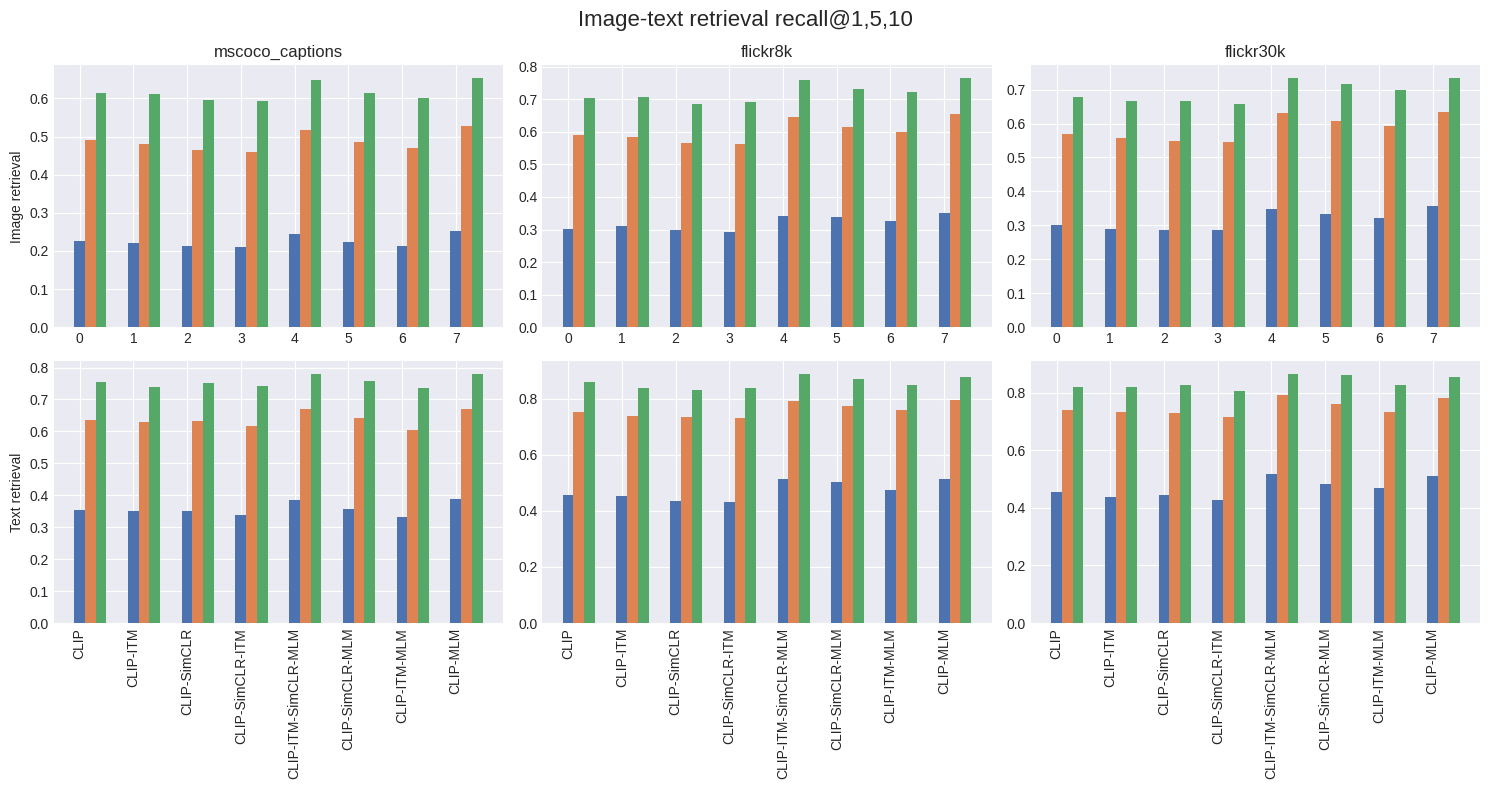

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.style.use("seaborn-v0_8-darkgrid")
colors = sns.color_palette("deep", 3)

# model_names = ["CLIP", "CLIP + ITM", "CLIP + SimCLR", "CLIP + SimCLR + ITM", "SimCLR + ITM", "SimCLR"]
model_order = [  # Model names
    "CLIP",  # 3burj4np
    "CLIP-ITM",  # 7m9tx2jf
    "CLIP-SimCLR",  # 95ddsmmz
    "CLIP-SimCLR-ITM",  # ng70n4a4
    "CLIP-ITM-SimCLR-MLM",  # tibwkymx
    "CLIP-SimCLR-MLM",  # txva2y48
    "CLIP-ITM-MLM",  # khb9ltyn
    "CLIP-MLM",  # shf56cne
    # "SimCLR-MLM",  # gtp8w6c4
    # "SimCLR-ITM",  # xpbl8wfc
    # "SimCLR",  # p99godxb
    # "SimCLR-ITM-MLM",  # bj2tw5qt
    # "ITM-MLM",  # mkqp8hhx
]
width = 0.2

fig, axs = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle("Image-text retrieval recall@1,5,10", fontsize=16)
axs[0,0].set_ylabel("Image retrieval")
axs[1,0].set_ylabel("Text retrieval")

xsplot = np.arange(len(model_order))

axs[0, 0].set_title(list(scores.keys())[0])
axs[0, 1].set_title(list(scores.keys())[1])
axs[0, 2].set_title(list(scores.keys())[2])

# for sind, dataset in enumerate(scores.keys()):
for i, modality in enumerate(["image_retrieval_recall", "text_retrieval_recall"]):
    for sind, dataset in enumerate(scores.keys()):
        recall_at_1 = [scores[dataset][model][f"{modality}@1"][0] if "MLM" in model else scores[dataset][model][f"{modality}@1"][-2] for model in model_order]
        recall_at_5 = [scores[dataset][model][f"{modality}@5"][0] if "MLM" in model else scores[dataset][model][f"{modality}@5"][-2] for model in model_order]
        recall_at_10 = [scores[dataset][model][f"{modality}@10"][0] if "MLM" in model else scores[dataset][model][f"{modality}@10"][-2] for model in model_order]
        # min_y = min(min(top1), min(top3), min(top5))
        axs[i, sind].bar(xsplot, recall_at_1, width=width, color=colors[0], label='Recall@1')
        axs[i, sind].bar(xsplot+width, recall_at_5, width=width, color=colors[1], label='Recall@5')
        axs[i, sind].bar(xsplot+width*2, recall_at_10, width=width, color=colors[2], label='Recall@10')
        if i == 1:
            axs[i, sind].set_xticks(xsplot, model_order, rotation=90)
        # axs.flat[sind].set_ylim(min_y - 0.05, 1.02)

# handles, labels = axs.flat[0].get_legend_handles_labels()
# fig.legend(handles, labels, bbox_to_anchor=(0.9, 0.25), loc='center')
# plt.legend(bbox_to_anchor=(1,1))
# plt.legend(loc="lower right", bbox_to_anchor=(1.5, 0))
fig.tight_layout()